# Figure 5: Two-alternative forced-choice decoder demonstrates enhanced stimulus discrimination in the absence of feedback

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statannotations.Annotator import Annotator
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def get_color_dict(palette_name='colorblind', n=None, color_names=None,
                   add_default_colors=True):
    """
    Returns color map dictionary from seaborn color palettes with hexadecimal triplet values.

    Parameters
    ----------
    palette_name : str
        Name of palette. Possible values are:
        'colorblind', 'deep', 'muted', 'bright', 'pastel', 'dark'
        For more options see seaborn.color_palette() docs.
    n : int
        Number of colors.
        If not None and arg color_names is given, arg n must be equal to len(color_names).
    color_names : list
        List of color names as strings e.g. for the color palette 'colorblind': ['blue',
        'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'lightblue']
        Must have the same length as colors in the color palette.
        If None, color names are set to ['c0', 'c1', 'c2', ...].
    add_default_colors : bool
        Add default colors that are need but that are not part of the color palette such as
        e.g. 'black'.
        If set to False, the color dict will only contain colors of the chosen palette.

    Returns
    -------
    color_dict: dict
         Color name as key and color triplet as value.
    """
    # Import done here to avoid problems for other user who don't have seaborn installed
    import seaborn as sns

    # Get list of sns colors as hexadecimal triplet
    sns_colors_l = sns.color_palette(palette_name).as_hex()
    if n is not None:
        sns_colors_l = sns_colors_l[:n]
    # Define color names if none are given
    if color_names is None:
        color_names = ["c%d" % i for i in range(0, len(sns_colors_l))]
    # Create color dict
    color_dict = dict.fromkeys(color_names)
    for color_name, color in zip(color_names, sns_colors_l):
        color_dict[color_name] = color
    # Add additional colors to palette
    if add_default_colors is True:
        color_dict['black'] = '#000000'

    return color_dict

In [3]:
color_dict = get_color_dict(color_names=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'lightblue'])

# Load data

In [4]:
# CT FB
filename = './data/decoder_opto_data_seed42.h5'
data_opto = pd.read_hdf(filename, "df")

In [5]:
data_opto.columns

Index(['m', 's', 'e', 'u', 'best_model', 'omi', 'rmi', 'emi', 'yhat_opto',
       'yhat_ctrl', 'D_opto', 'D_ctrl', 'perc_corr_opto', 'perc_corr_ctrl',
       'ratio'],
      dtype='object')

In [6]:
filename = './data/performance_data.h5'
df_performance =  pd.read_hdf(filename, "df")

In [7]:
df_performance.columns

Index(['config_name', 'config_color', 'config_opto', 'config_run',
       'config_eye', 'm', 's', 'e', 'u', 'paramset', 'omi_e', 'omi',
       'omi_spont', 'rmi', 'emi', 'r_train', 'r_test', 'r_mean_train',
       'r_mean_test', 'perm_score_true', 'perm_score_stim', 'perm_score_opto',
       'perm_score_run', 'perm_score_eye', 'perm_score_true_mean',
       'perm_score_stim_mean', 'perm_score_opto_mean', 'perm_score_run_mean',
       'perm_score_eye_mean', 'perm_pvalue_stim', 'perm_pvalue_opto',
       'perm_pvalue_run', 'perm_pvalue_eye'],
      dtype='object')

# Plots for one example unit

Plot decision matrices:

In [8]:
# Define example key
key = {'m':'Ntsr1Cre_2019_0008', 's': 5, 'e':8, 'u':21}
key_idx = data_opto[(data_opto['m']==key['m']) & (data_opto['s']==key['s']) & (data_opto['e']==key['e']) & (data_opto['u']==key['u'])].index[0]

n_rand_fragments = 20

# Get decision matrices
D_opto_off = data_opto.iloc[key_idx]['D_ctrl']
D_opto_on = data_opto.iloc[key_idx]['D_opto']

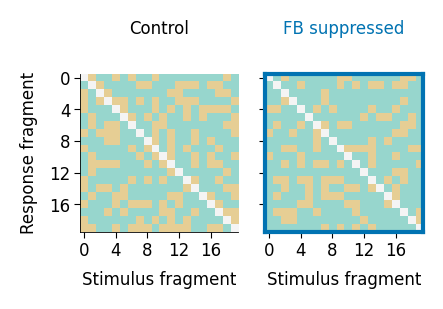

In [9]:
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(2.1,1.7),
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )

    # Control
    ax = ax_dict['a']
    ax.imshow(D_opto_off[:n_rand_fragments, :n_rand_fragments], cmap='BrBG', vmin=-3, vmax=3)
    ax.set_xticks(np.arange(0, n_rand_fragments, 4))
    ax.set_yticks(np.arange(0, n_rand_fragments, 4))
    ax.set_ylabel('Response fragment')
    ax.set_xlabel('Stimulus fragment')
    ax.set_title('Control', y=1.2)

    # Opto
    ax = ax_dict['b']
    # color
    for spine_loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine_loc].set_visible(True)
        ax.spines[spine_loc].set_linewidth(1.5)
        ax.spines[spine_loc].set_color(color_dict['blue'])
    # Plotting
    ax.imshow(D_opto_on[:n_rand_fragments, :n_rand_fragments], cmap='BrBG', vmin=-3, vmax=3)
    ax.set_xticks(np.arange(0, n_rand_fragments, 4))
    ax.set_yticks(np.arange(0, n_rand_fragments, 4))
    ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('Stimulus fragment')
    ax.set_title('FB suppressed', color=color_dict['blue'], y=1.2)

# Save plot
filename_plot = './plots/Fig5/{:s}_s{:02d}_e{:02d}_u{:02d}_decision_matrix'.format(key['m'], key['s'], key['e'], key['u'])
fig.patch.set_facecolor('white')
fig.savefig(filename_plot+'.svg', facecolor=fig.get_facecolor(), transparent=False)

Plot barplot:

In [11]:
# Define example key
key = {'m':'Ntsr1Cre_2019_0008', 's': 5, 'e':8, 'u':21}
key_idx = data_opto[(data_opto['m']==key['m']) & (data_opto['s']==key['s']) & (data_opto['e']==key['e']) & (data_opto['u']==key['u'])].index[0]

# Get decision matrices
n_rand_fragments = 20
D_opto_off = data_opto.iloc[key_idx]['D_ctrl']
D_opto_on = data_opto.iloc[key_idx]['D_opto']
percentages_corr_off = (np.sum(D_opto_off==1, axis=0)/D_opto_off.shape[0])*100
percentages_corr_on = (np.sum(D_opto_on==1, axis=0)/D_opto_on.shape[0])*100

# Build DataFrame for plotting
df_perc_corr = pd.DataFrame(dict(condition=['ctrl']*percentages_corr_off.shape[0]+['opto']*percentages_corr_on.shape[0],
                                percentage_corr=list(np.concatenate([percentages_corr_off, percentages_corr_on]))))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ctrl vs. opto: Mann-Whitney-Wilcoxon test two-sided, P_val:1.204e-12 U_stat=2.094e+03


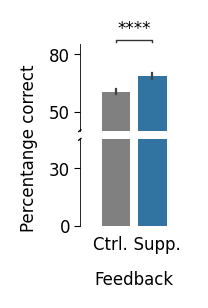

In [12]:
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    b
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(.7,1.2),
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    
    ax1 = ax_dict['a']
    # top part of the plot
    sns.barplot(data=df_perc_corr, x='condition', y='percentage_corr', ax=ax1, errwidth=.8, palette=['gray', 'tab:blue'])
    ax1.set_xlim([-1,2])
    ax1.set_xticks([])
    ax1.set_xticklabels([])
    ax1.set_xlabel('')
    ax1.spines['bottom'].set_visible(False)
    ax1.set_ylabel('Percentange correct', y=-.2)
    ax1.set_ylim([40, 85])
    ax1.set_yticks([50, 80])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis='both', which='major')

    # bottom part of the plot
    ax2 = ax_dict['b']
    sns.barplot(data=df_perc_corr, x='condition', y='percentage_corr', ax=ax2, palette=['gray', 'tab:blue'])
    ax2.set_xlim([-1, 2])
    ax2.set_xlabel('')
    ax2.set_ylim([0, 45])
    ax2.set_yticks([0, 30])
    ax2.set_ylabel('')
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='x', colors='white')
    ax2.set_xticklabels(['Ctrl.  ', '  Supp.'], color='k')
    ax2.set_xlabel('Feedback', labelpad=6)
    ax2.tick_params(axis='both', which='major')

    # Annotate significance
    annotator = Annotator(ax1, data=df_perc_corr, pairs=[('ctrl', 'opto')], x="condition", y='percentage_corr', order=None)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', fontsize=6, line_width=.5)
    annotator.apply_and_annotate()
    
    plt.subplots_adjust(wspace=0, hspace=.1)
    # break y-axis
    d = .01  # how big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, lw=.5)
    ax1.plot((-d, +d), (-d, +d), **kwargs) # top-left diagonal
    kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) # bottom-left diagonal



# Save plot
#filename_plot = './plots/Fig5/{:s}_s{:02d}_e{:02d}_u{:02d}_percentage_correct'.format(key['m'], key['s'], key['e'], key['u'])
#fig.patch.set_facecolor('white')
#fig.savefig(filename_plot+'.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ctrl vs. opto: Mann-Whitney-Wilcoxon test two-sided, P_val:1.204e-12 U_stat=2.094e+03


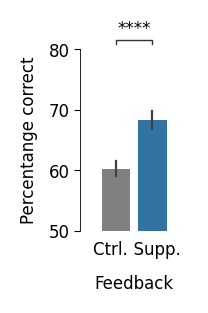

In [16]:
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(.7,1.2),
        dpi=200,
        constrained_layout=True,
        #sharex=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    
    ax1 = ax_dict['a']
    # top part of the plot
    sns.barplot(data=df_perc_corr, x='condition', y='percentage_corr', ax=ax1, errwidth=.8, palette=['gray', 'tab:blue'])
    
    ax1.set_xlim([-1, 2])
    ax1.set_xlabel('')
    ax1.set_ylim([50, 80])
    ax1.set_yticks([50, 60, 70, 80])
    ax1.set_ylabel('')
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis='x', colors='white')
    ax1.set_xticklabels(['Ctrl.  ', '  Supp.'], color='k')
    ax1.set_xlabel('Feedback', labelpad=6)
    ax1.tick_params(axis='both', which='major')
    ax1.set_ylabel('Percentange correct')
    
    # Annotate significance
    annotator = Annotator(ax1, data=df_perc_corr, pairs=[('ctrl', 'opto')], x="condition", y='percentage_corr', order=None)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', fontsize=6, line_width=.5)
    annotator.apply_and_annotate()
    
    plt.subplots_adjust(wspace=0, hspace=.1)

# Save plot
filename_plot = './plots/Fig5/{:s}_s{:02d}_e{:02d}_u{:02d}_percentage_correct'.format(key['m'], key['s'], key['e'], key['u'])
fig.patch.set_facecolor('white')
fig.savefig(filename_plot+'.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

In [15]:
df_perc_corr.groupby(['condition'])['percentage_corr'].mean()

condition
ctrl    60.27
opto    68.34
Name: percentage_corr, dtype: float64

# Population analysis

In [13]:
# Opto
perc_corr_ctrl = data_opto['perc_corr_ctrl'].values
perc_corr_opto = data_opto['perc_corr_opto'].values
#ratios_opto = data_opto['ratio'].values#perc_corr_opto/perc_corr_ctrl
ratios_opto = perc_corr_opto/perc_corr_ctrl

# MIs
omis = df_performance[df_performance['config_name']=='Full model']['omi'].values
rmis = df_performance[df_performance['config_name']=='Full model']['rmi'].values
emis = df_performance[df_performance['config_name']=='Full model']['emi'].values

#ylim = [.95, 1.2]
ylim = [np.min(ratios_opto), np.max(ratios_opto)+.02]

In [14]:
xticks = [.001, .1,1]
yticks = [1, 1.1, 1.2]

### Get significant neurons

In [15]:
pval_opto = df_performance[df_performance['config_name']=='Full model']['perm_pvalue_opto'].values 
signif_opto_idx = np.where([pval_opto<0.001])[1]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


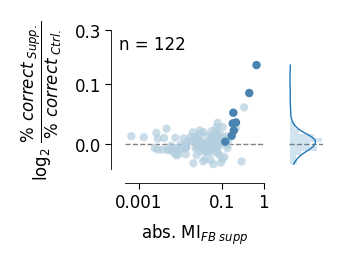

In [16]:
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(1.6,1.2),
        dpi=200,
        constrained_layout=True,
        gridspec_kw={"width_ratios":[1, .25]},
        
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    
    # Opto
    ax = ax_dict['a']
    sns.scatterplot(abs(omis), ratios_opto, edgecolor='none', facecolor='#b3cedeff', alpha=.7, ax=ax, zorder=1)
    sns.scatterplot(abs(omis)[signif_opto_idx], ratios_opto[signif_opto_idx], edgecolor='none', facecolor='#4884afff', ax=ax, zorder=2)
    ax.axhline(y=1, linestyle='--', color='gray', zorder=0)
    ax.set_xscale('log', basex=2)
    ax.set_yscale('log', basey=2)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_yticks(yticks)
    ax.set_yticklabels(np.round(np.log2(yticks),1))
    #ax.set_ylim(ylim)
    ax.set_xlabel('abs. MI$_{FB~supp}$')
    ax.set_ylabel('$\log_2~\dfrac{\%~correct_{~Supp.}}{\%~correct_{~Ctrl.}}$', loc='center')
    sns.despine(offset=5, trim=False, ax=ax)
    ax.tick_params(axis='both', which='major')
    ax.set_title('n = {:d}'.format(omis.shape[0]), y=.8, x=.2)
    
    ax = ax_dict['b']
    sns.histplot(y=ratios_opto, kde=True, edgecolor='none', alpha=.2, ax=ax)
    ax.axhline(y=1, linestyle='--', color='gray', zorder=0)
    ax.set_yscale('log', basey=2)
    ax.set_xlim([-1, ax_dict['b'].get_xlim()[1]])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylim(ax_dict['a'].get_ylim())
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    sns.despine(offset=5, trim=False, ax=ax, left=True, bottom=True)
    
    
    # Save plot
    filename_plot = './plots/Fig5/ratios_perc_correct_opto'
    fig.patch.set_facecolor('white')
    fig.savefig(filename_plot+'_v2.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
    fig.savefig(filename_plot+'_v2.png', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

# Stats on distribution of ratios

In [17]:
np.mean(ratios_opto)

1.0035055505723345

In [18]:
np.std(ratios_opto)

0.02081140086828937

In [19]:
np.var(ratios_opto, ddof=1)

0.0004366938640022937

In [20]:
scipy.stats.skewtest(ratios_opto)

SkewtestResult(statistic=7.511683046041104, pvalue=5.837197878069198e-14)

# Split ratios by modulation

In [58]:
df_performance.columns

Index(['config_name', 'config_color', 'config_opto', 'config_run',
       'config_eye', 'm', 's', 'e', 'u', 'paramset', 'omi_e', 'omi',
       'omi_spont', 'rmi', 'emi', 'r_train', 'r_test', 'r_mean_train',
       'r_mean_test', 'perm_score_true', 'perm_score_stim', 'perm_score_opto',
       'perm_score_run', 'perm_score_eye', 'perm_score_true_mean',
       'perm_score_stim_mean', 'perm_score_opto_mean', 'perm_score_run_mean',
       'perm_score_eye_mean', 'perm_pvalue_stim', 'perm_pvalue_opto',
       'perm_pvalue_run', 'perm_pvalue_eye'],
      dtype='object')

In [59]:
df_mod_split = pd.DataFrame(dict(ratio=ratios_opto,
                                 omi=omis,
                                 omi_abs=abs(omis),
                                 pval=df_performance[df_performance['config_name']=='Full model']['perm_pvalue_opto'].values,
                                 perf_perm_opto=df_performance[df_performance['config_name']=='Full model']['perm_score_opto_mean'].values,
                                 perf_full_model=df_performance[df_performance['config_name']=='Full model']['r_mean_train'].values,
                                )).sort_values(by=['omi_abs']).reset_index()
df_mod_split['effect_shuffle'] = df_mod_split['perf_full_model']-df_mod_split['perf_perm_opto']

signif05 = []
for h in ((df_mod_split['pval'] <= 0.05)).values:
    if h==False:
        signif05.append('No')
    else:
        signif05.append('Yes')
df_mod_split['signif05'] = signif05
df_mod_split['group'] = (['low']*11 + ['mid']*99 + ['high']*12)

In [60]:
df_mod_split

,index,ratio,omi,omi_abs,pval,perf_perm_opto,perf_full_model,effect_shuffle,signif05,group
0,90,1.010264,0.000511,0.000511,0.736354,0.318660,0.355094,0.036434,No,low
1,6,1.017330,-0.001153,0.001153,0.758532,0.107263,0.177524,0.070261,No,low
2,100,0.990621,-0.002230,0.002230,0.529051,0.119184,0.167708,0.048524,No,low
3,91,0.990568,0.003123,0.003123,0.736354,0.589867,0.623412,0.033545,No,low
4,96,1.008002,0.003345,0.003345,0.941653,0.149435,0.176421,0.026986,No,low
...,...,...,...,...,...,...,...,...,...,...
117,13,1.034395,-0.226862,0.226862,0.000267,0.100865,0.339889,0.239024,Yes,high
118,17,0.971720,-0.310236,0.310236,0.736354,0.165218,0.314339,0.149121,No,high
119,14,1.059592,-0.346327,0.346327,0.017029,0.160047,0.289908,0.129861,Yes,high
120,20,1.084293,-0.448730,0.448730,0.000267,0.060434,0.374399,0.313965,Yes,high


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: Mann-Whitney-Wilcoxon test two-sided, P_val:4.353e-05 U_stat=1.840e+02


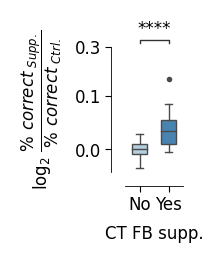

In [61]:
yticks = [1, 1.1, 1.2]
ylim=[.93, 1.2]

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(.9,1.2),
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    
    ax = ax_dict['a']

    sns.boxplot(data=df_mod_split,
               x='signif05',
               y='ratio',
               ax=ax,
               width=.5,
               palette='Blues',
               fliersize=2,
               flierprops={"marker": "."},
               )
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_yscale('log', basey=2)
    ax.set_yticks(yticks)
    ax.set_yticklabels(np.round(np.log2(yticks),1))

    ax.set_xlabel('CT FB modulation')
    ax.set_ylabel('$\log_2~\dfrac{\%~correct_{~Supp.}}{\%~correct_{~Ctrl.}}$', loc='center')
    sns.despine(trim=False, offset=5)

    # Annotate significance
    annotator = Annotator(ax, data=df_mod_split, pairs=[('No', 'Yes')], x="signif05", y='ratio', order=None)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', fontsize=6, line_width=.5)
    annotator.apply_and_annotate()

filename_plot = './plots/Fig5/ratios_split_by_modulation'
fig.patch.set_facecolor('white')
fig.savefig(filename_plot+'.svg', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)
fig.savefig(filename_plot+'.png', bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)